# PIT

In [9]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

In [10]:
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [13]:
xmin = -10
xmax= 10
x = np.linspace(xmin, xmax, num=10000)
# mean and standard deviation
mu = 5
sigma = 2

# sample the distribution
number_of_samples = 5000
samples = np.random.normal(mu, sigma, number_of_samples)
samples.sort()

In [7]:
# get sample parameters
sample_mean = np.mean(samples)
sample_std = np.std(samples)

In [8]:
true_distribution = stats.norm.pdf(x, mu, sigma)

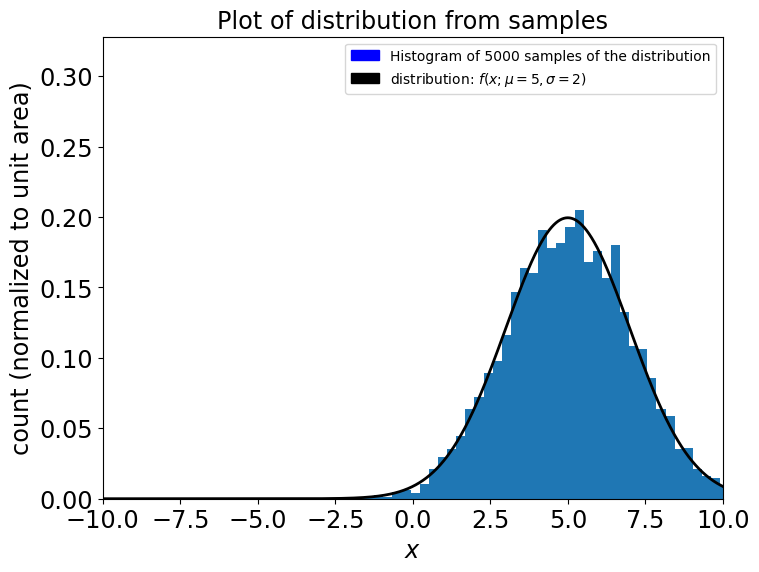

In [14]:
n_bins = 1
if number_of_samples < 50:
    n_bins = number_of_samples
else:
    n_bins = 50

# Plots
plt.figure(1)

# Plot histogram of samples
hist_count, bins, _ = plt.hist(samples, n_bins, density=True)  # Norm to keep distribution in view
# Plot distribution using sample parameters
plt.plot(x, true_distribution, linewidth=2, color="black")

# Axes
plt.title("Plot of distribution from samples")
plt.xlabel("$x$")
plt.ylabel("count (normalized to unit area)")
sample_window_w = sample_std * 1.5
# plt.xlim([sample_mean - sample_window_w, sample_mean + sample_window_w])
plt.xlim([xmin, xmax])
plt.ylim([0, hist_count.max() * 1.6])

# Legends
sample_patch = mpatches.Patch(color="black", label=fr"distribution: $f(x;\mu={mu},\sigma={sigma})$")
data_patch = mpatches.Patch(color="blue",label=f"Histogram of {number_of_samples} samples of the distribution",)

plt.legend(handles=[data_patch, sample_patch])

plt.show()
# print(samples)

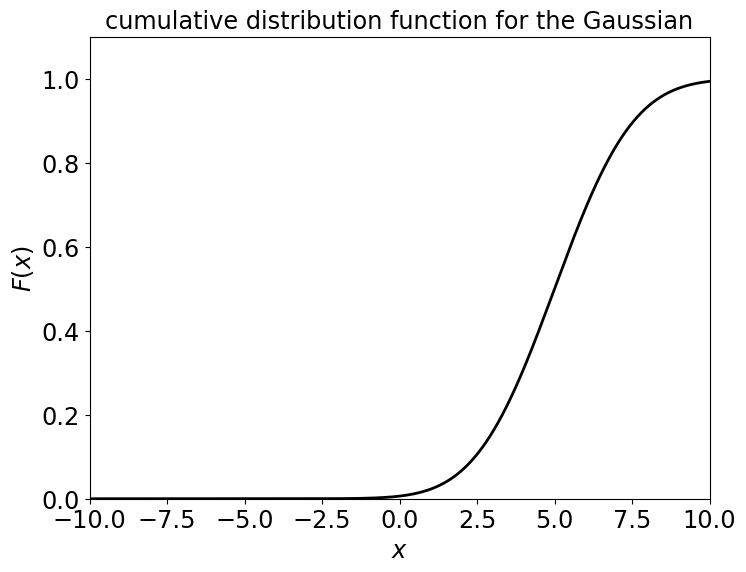

In [16]:
# Plots
plt.figure(1)

# Plot distribution using sample parameters
plt.plot(x, stats.norm.cdf(x,mu,sigma), linewidth=2, color="black")

# Axes
plt.title("cumulative distribution function for the Gaussian")
plt.xlabel("$x$")
plt.ylabel("$F(x)$")

plt.xlim([xmin, xmax])
plt.ylim([0, 1.1])

plt.show()

# Calculate PIT

In [19]:
output = stats.norm.cdf(samples,mu,sigma)
print(output)

[1.04288251e-04 3.47084428e-04 5.11536118e-04 ... 9.99600912e-01
 9.99707837e-01 9.99859791e-01]


In [18]:
# uniform distribution
uniform_distribution = stats.uniform.pdf(x)

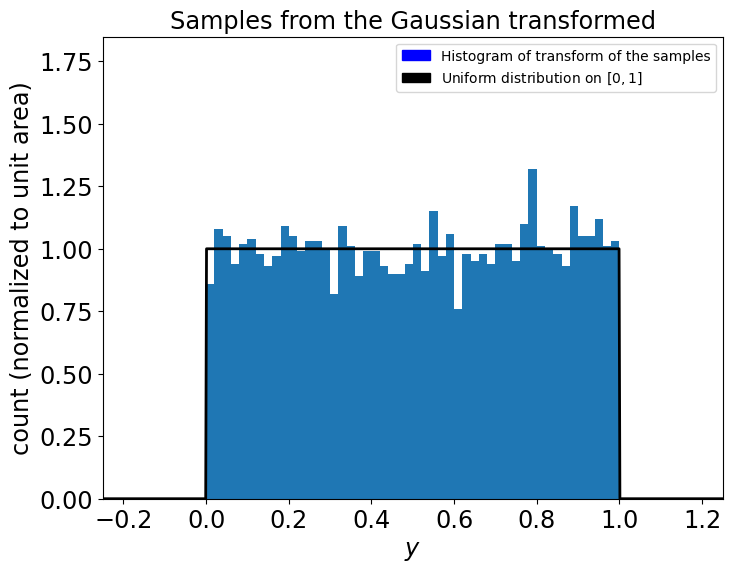

In [20]:
# Plots
plt.figure(1)

# Plot histogram of samples
hist_count, bins, _ = plt.hist(output, n_bins, density=True)  # Norm to keep distribution in view
# Plot distribution using sample parameters
plt.plot(x, uniform_distribution, linewidth=2, color="black")
# Axes
plt.title("Samples from the Gaussian transformed")
plt.xlabel("$y$")
plt.ylabel("count (normalized to unit area)")

plt.xlim([-0.25, 1.25])
plt.ylim([0, hist_count.max() * 1.4])

# Legends
sample_patch = mpatches.Patch(
    color="black", label=f"Uniform distribution on $[{0},{1}]$"
)
data_patch = mpatches.Patch(color="blue", label="Histogram of transform of the samples")

plt.legend(handles=[data_patch, sample_patch])

plt.show()